In [1]:
# first running this after the training script ran for about 500 rounds

In [1]:
from game import *

pygame 2.6.1 (SDL 2.28.4, Python 3.12.8)
Hello from the pygame community. https://www.pygame.org/contribute.html


In [2]:
game_settings = BIG_tool_use_advanced_2_5
game_settings.gameSize = 224 # for compatibility with brain's expected size
G = discreteGame(game_settings) # kind of a waste; will only call this object to generate random versions of itself

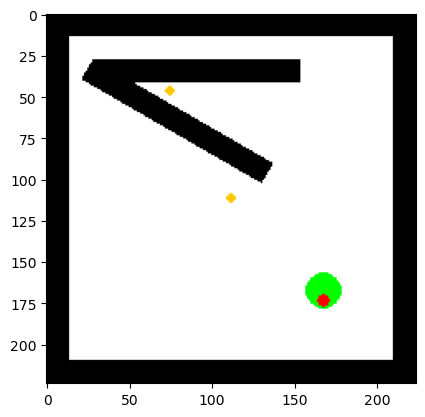

In [3]:
import matplotlib.pyplot as plt
plt.imshow(G.getData())

In [4]:
from RL_helper import *

In [5]:
from visual_transformer import *
device = torch.device('cuda:1') # doing this on the P40

In [6]:
def quick_display(torch_img):
    clean = torch_img.detach().cpu()
    right_order = torch.permute(clean, (1, 2, 0))
    array = right_order.numpy()
    plt.imshow(array)

In [7]:
symbol_action_map = {1: 1, 2: 2, 3: 3, 4: 4}
symbol_action_map

{1: 1, 2: 2, 3: 3, 4: 4}

In [69]:
# Next, I need to set up the brain itself
brain = DefaultAgentBrain(5).to(device)
#brain.load_state_dict(torch.load("brain_checkpoints/brain_EXPERIMENTAL_5output_weights_semi-guided_RL_GRPO_v2_round10.pth", weights_only=True, map_location=device))
#brain.load_state_dict(torch.load("brain_checkpoints/brain_EXPERIMENTAL_5output_weights_fake-traces_RL_GRPO_v1_round20.pth", weights_only=True, map_location=device))
brain.load_state_dict(torch.load("brain_checkpoints/brain_EXPERIMENTAL_5output_weights_fake-traces_improved_v1_round20000.pth", weights_only=True, map_location=device))

<All keys matched successfully>

In [70]:
# Alternative, let's look at the untrained brain behavior:
# Next, I need to set up the brain itself
#old_brain = DefaultAgentBrain()
#old_brain.load_state_dict(torch.load('brain_checkpoints/brain_weights_tutorial1_v3_batch95000.pth', weights_only=True, map_location='cpu'))

#brain = DefaultAgentBrain(5)
#brain.img_enc = old_brain.img_enc
#brain.img_dec = old_brain.img_dec
#brain = brain.to(device)

In [71]:
brain.train()


DefaultAgentBrain(
  (img_enc): ImageTransformerEncoder(
    (embed): Sequential(
      (0): PatchEmbedding(
        (linear_project): Conv2d(3, 768, kernel_size=(14, 14), stride=(14, 14))
      )
      (1): PositionalEncoding_2D()
      (2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
      (3): Dropout(p=0.1, inplace=False)
    )
    (pe): PositionalEncoding_2D()
    (encoder): TransformerEncoder(
      (layers): ModuleList(
        (0-5): 6 x TransformerEncoderLayer(
          (self_attn): MultiheadAttention(
            (out_proj): NonDynamicallyQuantizableLinear(in_features=768, out_features=768, bias=True)
          )
          (linear1): Linear(in_features=768, out_features=2048, bias=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (linear2): Linear(in_features=2048, out_features=768, bias=True)
          (norm1): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (norm2): LayerNorm((768,), eps=1e-05, elementwise_affine=True)
          (

In [10]:
from RL_logic_solver import *

In [72]:
see_traces=False
batch_size=16
buff_classic = GameOutputBuffer(brain, brain.evaluate_text, gamma=0.99, tau=0.97, default_batch_size=batch_size, see_traces=False)
buff_guide = GameOutputBuffer(brain, brain.evaluate_text, gamma=0.99, tau=0.97, default_batch_size=batch_size, see_traces=False)

In [73]:
buff_classic.fill(G, num_games=batch_size)
fake_data_fill(buff_guide, G, batch_size, device=device)

In [31]:
buff_guide.see_traces

False

In [32]:
# Let's examine game 0

In [13]:
buff_guide.__dict__

{'seed_offset': 1,
 'max_agent_offset': 0.5,
 'see_traces': False,
 'tau': 0.97,
 'gamma': 0.99,
 'default_batch_size': 16,
 'contexts': None,
 'logpas': tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0., 0., 0., 0., 0., 0.],
         [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
          0., 0.

In [15]:
buff_classic.__dict__

{'seed_offset': 1,
 'max_agent_offset': 0.5,
 'see_traces': False,
 'tau': 0.97,
 'gamma': 0.99,
 'default_batch_size': 16,
 'contexts': None,
 'logpas': tensor([[-2.0504e-05, -4.1008e-05, -8.1062e-06, -2.7657e-05, -4.4298e-04,
          -8.8220e-03, -1.9086e-02, -2.6883e-01, -1.6071e-02, -1.0750e-01,
          -4.0099e-02, -1.2674e-01, -1.0924e+00, -1.8642e-01, -1.8984e+00,
          -4.8652e-03, -1.0346e-01, -1.0446e-02, -2.8856e-01, -8.7807e-01,
          -4.0837e-01, -1.6676e-01, -5.3115e-01, -5.2499e-01, -5.0212e-01,
          -1.8877e-01, -1.3945e-01, -2.1750e-02, -3.9752e-01, -3.7729e+00,
          -1.2997e-01],
         [-1.3061e-01, -1.5921e-01, -6.6067e-02, -5.2323e-01, -7.3949e-02,
          -9.6922e-03, -1.9550e-03, -7.3419e-03, -5.8274e-03, -1.2069e-02,
          -6.6785e-01, -1.2279e-03, -1.5856e+00, -1.0324e-02, -1.3197e-02,
          -3.7763e-02, -3.3913e-02, -6.0797e-03, -9.0642e-02, -5.1751e-03,
          -2.5172e-03, -2.7933e+00, -1.6722e-02, -2.1231e-02, -2.1048e-03

In [74]:
torch.sum(buff_guide.rewards)

tensor(14, device='cuda:1')

In [75]:
torch.sum(buff_classic.rewards)

tensor(9., device='cuda:1')

In [16]:
game_trace = buff_classic.settings_buffer[0]

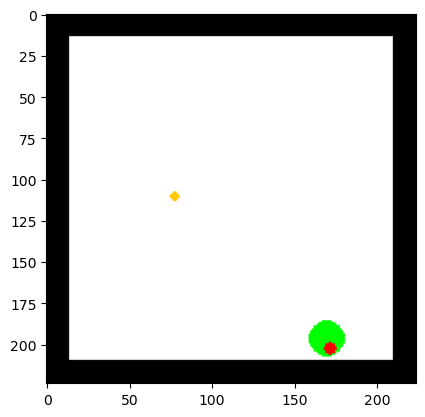

In [17]:
plt.imshow(discreteGame(game_trace[0]).getData())

In [19]:
game_trace[7].direction

0.43360457831522564

In [20]:
game_trace[0].agent_x

0.36470384173611137

In [21]:
game_trace[10].agent_x

0.36470384173611137

In [22]:
buff_guide.rewards

tensor([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 1, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 1, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 1, 0, 0, 0, 0, 0, 0],
        [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [23]:
# Main proble so far: all the settings are stored wrong. Only the initial value is storedd, not any subsequent one at all
# This is true at the very least in the case of the 'fake data fill' func.
# THis must change.
#
# It was also cool to see that, after round 10, the agent tried to turn and then go forward. It failed to go far enough, 
# but clearly this imitiation strategy works a little.
# fake_data-fill also needs not to call the dopamine func or the gaes, unless I want it to. Add that option.

In [23]:
buff_guide.returns

tensor([[0.7397, 0.7472, 0.7547, 0.7623, 0.7700, 0.7778, 0.7857, 0.7936, 0.8016,
         0.8097, 0.8179, 0.8262, 0.8345, 0.8429, 0.8515, 0.8601, 0.8687, 0.8775,
         0.8864, 0.8953, 0.9044, 0.9135, 0.9227, 0.9321, 0.9415, 0.9510, 0.9606,
         0.9703, 0.9801, 0.9900, 1.0000, 0.0000],
        [0.8687, 0.8775, 0.8864, 0.8953, 0.9044, 0.9135, 0.9227, 0.9321, 0.9415,
         0.9510, 0.9606, 0.9703, 0.9801, 0.9900, 1.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9703, 0.9801, 0.9900, 1.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000],
        [0.9321, 0.9415, 0.9510, 0.9606, 0.9703, 0.9801, 0.9900, 1.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000,

In [131]:
buff_classic.traces

tensor([[0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3],
        [0, 1, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 4,
         4, 4, 4, 4, 3, 4, 4, 4],
        [0, 1, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 3, 3, 4, 4, 3, 4, 4, 4, 1,
         4, 4, 4, 4, 4, 4, 4, 4],
        [0, 1, 1, 3, 3, 1, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 3, 3, 3, 3, 3],
        [0, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 3, 3, 4, 4, 4, 3, 4, 3, 4, 4, 3, 3,
         4, 3, 3, 4, 3, 3, 4, 4],
        [0, 4, 1, 3, 4, 4, 3, 3, 4, 3, 3, 4, 4, 3, 3, 3, 3, 3, 3, 4, 3, 4, 4, 4,
         3, 4, 3, 4, 3, 3, 4, 3],
        [0, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 4, 4, 4, 4],
        [0, 4, 4, 1, 4, 4, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 3, 4, 4, 1, 4, 4, 1, 1,
         1, 1, 4, 4, 4, 4, 1, 4],
        [0, 4, 3, 4, 3, 4, 4, 1, 4, 3, 1, 4, 4, 4, 4, 4, 1, 1, 3, 4, 3, 4, 3, 4,

In [132]:
torch.sum(buff_classic.rewards)

tensor(1., device='cuda:1')

In [133]:
buff_classic.rewards

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 

In [136]:
torch.argmax(buff_classic.rewards) / (buff_classic.rewards).size()[1]

tensor(15.7500, device='cuda:1')

In [137]:
buff_classic.rewards[15]

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       device='cuda:1')

In [138]:
game_trace = buff_classic.settings_buffer[15]

In [174]:
i = 0

26
0
0.9384644031524658


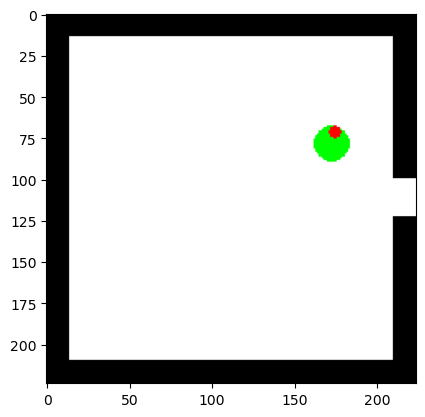

In [201]:
print(i)
print(buff_classic.traces[15, i + 1].item())
print(torch.exp(buff_classic.logpas[15, i]).item())
plt.imshow(discreteGame(game_trace[i]).getData())
i += 1

In [150]:
buff_classic.traces[0, 22]

tensor(3, device='cuda:1')

In [52]:
buff_classic.gaes

In [53]:
# Ok, at stage 10 it was trying to do something. Probably over-spinning.
# Let's look at the final stages

In [72]:
# let's not waste gpu space
buff_classic.cpu()
buff_guide.cpu()

In [94]:
def average_return(bb):
    """The average return (at the end of the seeds alone) from a buffer-buffer"""
    s = torch.zeros(bb[0].returns[:, 0].size(), device = bb[0].returns[:, 0].device)
    for b in bb:
        #s += bb[0].returns[:, 0]
        s += b.returns[:, 0]
    return torch.sum(s).item()/(len(bb) * bb[0].returns.size()[0])

In [95]:
def get_bb(num_buffers=64, batch_size=1, start_with_guide=True):
    bb = []
    brain.eval()
    for i in range(num_buffers):
        print(i)
        # In this case, we are only training the 'dopamine' layer on the val training loop
        buff = GameOutputBuffer(brain, brain.evaluate_text, gamma=0.99, tau=0.97, default_batch_size=batch_size)
        if start_with_guide and (i == 0):
            fake_data_fill(buff, G, batch_size, device=device) # This one guide is the only difference between this and the main one.
        else:
            buff.fill(G, num_games=batch_size)
        buff.cpu()
        bb.append(buff)
        #print(buff.traces)
    score = average_return(bb)
    score_tensor = torch.tensor([score], device=device)
    for i in range(num_buffers):
        print(i)
        buff = bb[i]
        buff.to(device)
        buff.use_values(score_tensor) # computes values tensor and gae's
        buff.cpu()
    return bb

In [96]:
bb = get_bb(num_buffers=8, batch_size=16)

0
1
2
3
4
5
6
7
0
1
2
3
4
5
6
7


In [97]:
bb[0].traces

tensor([[0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 1, 1, 1, 1, 1, 1, 2],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 1, 1, 1, 1, 2, 0, 0],
        [0, 4, 1, 1, 1, 1, 1, 1, 1, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         3, 3, 3, 1, 1, 1, 1, 2],
        [0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
         4, 4, 4, 4, 1, 1, 2, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3,
         1, 1, 1, 1, 1, 2, 0, 0],
        [0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 1, 1, 1, 2, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1,

In [98]:
bb[1].traces

tensor([[0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1,
         3, 1, 2, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 0, 1, 1, 3, 2,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,
         3, 1, 1, 3, 1, 4, 1, 1],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,
         2, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 2, 0, 0, 0, 0,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 2,
         0, 0, 0, 0, 0, 0, 0, 0],
        [0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1,

In [78]:
bb[1].values

tensor([[0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295],
        [0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295],
        [0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295, 0.1295],
        [0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295, 0.1295,
         0.1295, 0.1295, 0.1295, 0.1295,

In [79]:
bb[3].gaes

tensor([[-0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295],
        [-0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295],
        [-0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295],
        [-0.1295, -0.1295, -0.1295, -0.1295, -0.1295

In [80]:
bb[0].gaes

tensor([[ 0.8605,  0.8705, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295],
        [ 0.8311,  0.8408,  0.8506,  0.8605,  0.8705, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295],
        [ 0.7392,  0.7480,  0.7569,  0.7658,  0.7749,  0.7840,  0.7932,  0.8026,
          0.8120,  0.8215,  0.8311,  0.8408,  0.8506,  0.8605,  0.8705, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295,
         -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295, -0.1295],
        [ 0.7480,  0.7569,  0.7658,  0.7749,  0.7840

In [81]:
bb[0].gaes.size()

torch.Size([16, 31])

In [82]:
bb[0].logpas.size()

torch.Size([16, 31])

In [83]:
mse_loss = nn.MSELoss()

In [84]:
policy_optimizer = optim.Adam(list(brain.text_enc.parameters()) + list(brain.text_dec.parameters()), lr=0.00001, eps=1e-9)
policy_epochs = 4
epochs = policy_epochs

In [85]:
# guide firset
buffer = bb[0]

In [86]:
buffer.to(device)

In [87]:
policy_optimizer.zero_grad()

In [89]:
logpas, entropies = buffer.get_probabilities_and_entropies(evaluation=False)

In [90]:
logpas

tensor([[-6.2931e+00, -8.3084e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00],
        [-3.7560e-03, -4.6878e+00, -2.4753e-03, -1.4563e-03, -7.9627e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00],
        [-5.1756e-03, -1.8848e-02, -2.9672e-02, -3.7941e-02, -4.45

In [92]:
for i in range(30):
    print(logpas[1, i].item())
    print(buffer.traces[1, i + 1].item())
    print(buffer.gaes[1, i+1].item())
    print('\n')

-0.0037560462951660156
3
0.8407933712005615


-4.687807559967041
1
0.8505944013595581


-0.002475261688232422
1
0.8604943752288818


-0.0014562606811523438
1
0.8704943656921387


-7.962668418884277
2
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372


-0.0
0
-0.12950566411018372




In [43]:
#settings = [S[0] for S in buffer.settings_buffer]

In [44]:
#imgs = get_images_settings(settings, device=device)

In [45]:
#with torch.no_grad():
#    context = brain.img_enc(imgs)

In [46]:
buffer.logpas

tensor([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0.],

In [47]:
ratios = (logpas - buffer.logpas).exp()
ratios

tensor([[3.1435e-03, 9.9305e-01, 9.9664e-01, 9.9720e-01, 9.9736e-01, 9.9741e-01,
         9.9742e-01, 9.9741e-01, 9.9741e-01, 9.9740e-01, 9.9737e-01, 9.9734e-01,
         9.9731e-01, 9.9726e-01, 9.9721e-01, 9.9716e-01, 9.9712e-01, 9.9711e-01,
         9.9710e-01, 9.9707e-01, 9.9703e-01, 9.9697e-01, 9.9690e-01, 9.9686e-01,
         9.9686e-01, 9.9689e-01, 9.9690e-01, 9.9687e-01, 9.9683e-01, 1.0696e-03,
         1.1835e-03],
        [1.6451e-03, 9.7686e-01, 1.6053e-02, 9.9337e-01, 9.9414e-01, 9.9387e-01,
         9.9347e-01, 9.9299e-01, 3.0734e-03, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [2.0562e-03, 9.7586e-01, 9.7913e-01, 9.7770e-01, 9.7597e-01, 9.7424e-01,
         9.7271e-01, 9.7117e-01, 9.6969e-01, 9.6850e-01, 9.6728e-

In [48]:
# Ok, I do not trust these probabilities at all, based on how the brain performs outside the 'guided' framework
# I think that something is wrong with brain.compute_probabilities
# -- update: fixed (trace indices in input were incorrect)

In [49]:
buffer.traces[0]

tensor([0, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,
        4, 4, 4, 4, 4, 4, 1, 2], device='cuda:1')

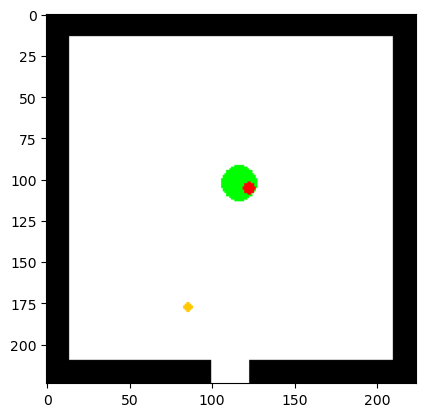

In [50]:
game_trace = buffer.settings_buffer[4]
plt.imshow(discreteGame(game_trace[0]).getData())

In [51]:
logpas[4]

tensor([-6.3298, -0.0221, -0.0191, -0.0202, -0.0219, -0.0232, -0.0246, -0.0261,
        -0.0274, -0.0285, -0.0295, -0.0305, -0.0312, -0.0323, -3.5336, -0.6322,
        -0.1076, -0.0431, -0.0262, -5.7412, -0.0000, -0.0000, -0.0000, -0.0000,
        -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000, -0.0000],
       device='cuda:1', grad_fn=<SelectBackward0>)

In [52]:
imgs = get_images_settings([game_trace[0]], device=device)

In [53]:
imgs.size()

torch.Size([1, 3, 224, 224])

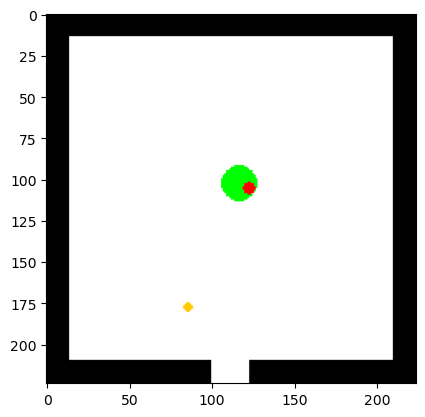

In [54]:
quick_display(imgs[0])

In [55]:
with torch.no_grad():
    context = brain.img_enc(imgs)

In [56]:
context

tensor([[[-1.2476e+00, -5.5677e-01, -7.4340e-01,  ...,  4.5025e-01,
          -2.4911e-03, -1.8403e-01],
         [-1.2460e+00, -5.5730e-01, -7.4189e-01,  ...,  4.5008e-01,
          -2.6106e-03, -1.8303e-01],
         [-1.2427e+00, -5.5620e-01, -7.4155e-01,  ...,  4.5243e-01,
          -5.5726e-06, -1.7954e-01],
         ...,
         [-1.2675e+00, -5.6382e-01, -7.5288e-01,  ...,  4.6333e-01,
           6.0835e-03, -1.6132e-01],
         [-1.2694e+00, -5.6424e-01, -7.5460e-01,  ...,  4.6153e-01,
           6.0948e-03, -1.6063e-01],
         [-1.2695e+00, -5.6452e-01, -7.5563e-01,  ...,  4.6195e-01,
           7.5296e-03, -1.5872e-01]]], device='cuda:1')

In [57]:
context.size()

torch.Size([1, 256, 768])

In [58]:
buffer.seed_offset

1

In [59]:
traces = buffer.traces[0:1, 0:4]

In [60]:
traces.size()

torch.Size([1, 4])

In [61]:
traces

tensor([[0, 4, 4, 4]], device='cuda:1')

In [62]:
new_logpas, new_ents = brain.compute_probabilities(traces, single=True, context=context)

In [63]:
new_logpas

tensor([-0.0029], device='cuda:1', grad_fn=<SqueezeBackward1>)

In [64]:
# ok, now that is very different from what was stored before.
# Cute. So the 'brain' did learn how to simply copy the previous instruction.

In [65]:
# Ok. I think htere was an extra 'plus one' which did not take into account the seed_offset.
# I want every trace element *before* ind, but not any more.
# Let's recompute these.

In [66]:
# Ok, what else


In [67]:
logpas

tensor([[-5.7624e+00, -6.9761e-03, -3.3646e-03, -2.8067e-03, -2.6436e-03,
         -2.5978e-03, -2.5830e-03, -2.5897e-03, -2.5945e-03, -2.6040e-03,
         -2.6317e-03, -2.6612e-03, -2.6951e-03, -2.7390e-03, -2.7966e-03,
         -2.8458e-03, -2.8858e-03, -2.8920e-03, -2.9044e-03, -2.9387e-03,
         -2.9745e-03, -3.0394e-03, -3.1052e-03, -3.1438e-03, -3.1433e-03,
         -3.1099e-03, -3.1095e-03, -3.1347e-03, -3.1748e-03, -6.8405e+00,
         -6.7393e+00],
        [-6.4099e+00, -2.3417e-02, -4.1318e+00, -6.6566e-03, -5.8780e-03,
         -6.1440e-03, -6.5465e-03, -7.0376e-03, -5.7850e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00, -0.0000e+00,
         -0.0000e+00],
        [-6.1869e+00, -2.4431e-02, -2.1096e-02, -2.2555e-02, -2.43

In [68]:
ratios = (logpas - buffer.logpas).exp()
ratios

tensor([[3.1435e-03, 9.9305e-01, 9.9664e-01, 9.9720e-01, 9.9736e-01, 9.9741e-01,
         9.9742e-01, 9.9741e-01, 9.9741e-01, 9.9740e-01, 9.9737e-01, 9.9734e-01,
         9.9731e-01, 9.9726e-01, 9.9721e-01, 9.9716e-01, 9.9712e-01, 9.9711e-01,
         9.9710e-01, 9.9707e-01, 9.9703e-01, 9.9697e-01, 9.9690e-01, 9.9686e-01,
         9.9686e-01, 9.9689e-01, 9.9690e-01, 9.9687e-01, 9.9683e-01, 1.0696e-03,
         1.1835e-03],
        [1.6451e-03, 9.7686e-01, 1.6053e-02, 9.9337e-01, 9.9414e-01, 9.9387e-01,
         9.9347e-01, 9.9299e-01, 3.0734e-03, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00, 1.0000e+00,
         1.0000e+00],
        [2.0562e-03, 9.7586e-01, 9.7913e-01, 9.7770e-01, 9.7597e-01, 9.7424e-01,
         9.7271e-01, 9.7117e-01, 9.6969e-01, 9.6850e-01, 9.6728e-

In [69]:
buffer.gaes

tensor([[-0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782],
        [ 0.8445,  0.8539,  0.8633,  0.8728,  0.8824,  0.8921,  0.9019,  0.9118,
          0.9218, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782],
        [-0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782],
        [-0.0782, -0.0782, -0.0782, -0.0782, -0.0782

In [70]:
pi_obj = buffer.gaes * ratios
pi_obj

tensor([[-2.4584e-04, -7.7661e-02, -7.7942e-02, -7.7985e-02, -7.7998e-02,
         -7.8002e-02, -7.8003e-02, -7.8002e-02, -7.8002e-02, -7.8001e-02,
         -7.7999e-02, -7.7997e-02, -7.7994e-02, -7.7991e-02, -7.7986e-02,
         -7.7982e-02, -7.7979e-02, -7.7979e-02, -7.7978e-02, -7.7975e-02,
         -7.7972e-02, -7.7967e-02, -7.7962e-02, -7.7959e-02, -7.7959e-02,
         -7.7962e-02, -7.7962e-02, -7.7960e-02, -7.7957e-02, -8.3645e-05,
         -9.2555e-05],
        [ 1.3894e-03,  8.3410e-01,  1.3859e-02,  8.6700e-01,  8.7722e-01,
          8.8663e-01,  8.9601e-01,  9.0540e-01,  2.8331e-03, -7.8204e-02,
         -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02,
         -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02,
         -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02,
         -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02,
         -7.8204e-02],
        [-1.6080e-04, -7.6317e-02, -7.6572e-02, -7.6460e-02, -7.63

In [71]:
policy_clip_range = 0.1
pi_obj_clipped = buffer.gaes * ratios.clamp(1.0 - policy_clip_range,
                                                       1.0 + policy_clip_range)
pi_obj_clipped

tensor([[-0.0704, -0.0777, -0.0779, -0.0780, -0.0780, -0.0780, -0.0780, -0.0780,
         -0.0780, -0.0780, -0.0780, -0.0780, -0.0780, -0.0780, -0.0780, -0.0780,
         -0.0780, -0.0780, -0.0780, -0.0780, -0.0780, -0.0780, -0.0780, -0.0780,
         -0.0780, -0.0780, -0.0780, -0.0780, -0.0780, -0.0704, -0.0704],
        [ 0.7601,  0.8341,  0.7769,  0.8670,  0.8772,  0.8866,  0.8960,  0.9054,
          0.8296, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782,
         -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782, -0.0782],
        [-0.0704, -0.0763, -0.0766, -0.0765, -0.0763, -0.0762, -0.0761, -0.0759,
         -0.0758, -0.0757, -0.0756, -0.0756, -0.0755, -0.0754, -0.0753, -0.0752,
         -0.0751, -0.0750, -0.0749, -0.0749, -0.0748, -0.0748, -0.0747, -0.0746,
         -0.0746, -0.0746, -0.0704, -0.0704, -0.0704, -0.0704, -0.0704],
        [-0.0704, -0.0777, -0.0780, -0.0780, -0.0780

In [72]:
# I don't like the implications of pi_obj_clipped.
# I don't like the fact that the gradient will likely not transfer
# I will make pi objective clipping optional and turn it off next round
#  -- never mind. The 'min' removes this problem

In [73]:
torch.min(pi_obj, pi_obj_clipped)

tensor([[-7.0384e-02, -7.7661e-02, -7.7942e-02, -7.7985e-02, -7.7998e-02,
         -7.8002e-02, -7.8003e-02, -7.8002e-02, -7.8002e-02, -7.8001e-02,
         -7.7999e-02, -7.7997e-02, -7.7994e-02, -7.7991e-02, -7.7986e-02,
         -7.7982e-02, -7.7979e-02, -7.7979e-02, -7.7978e-02, -7.7975e-02,
         -7.7972e-02, -7.7967e-02, -7.7962e-02, -7.7959e-02, -7.7959e-02,
         -7.7962e-02, -7.7962e-02, -7.7960e-02, -7.7957e-02, -7.0384e-02,
         -7.0384e-02],
        [ 1.3894e-03,  8.3410e-01,  1.3859e-02,  8.6700e-01,  8.7722e-01,
          8.8663e-01,  8.9601e-01,  9.0540e-01,  2.8331e-03, -7.8204e-02,
         -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02,
         -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02,
         -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02,
         -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02, -7.8204e-02,
         -7.8204e-02],
        [-7.0384e-02, -7.6317e-02, -7.6572e-02, -7.6460e-02, -7.63

In [74]:
policy_loss = -torch.min(pi_obj, pi_obj_clipped).mean()
policy_loss

tensor(-0.2540, device='cuda:1', grad_fn=<NegBackward0>)

In [75]:
# negative because this is 'better than expected'. Because this is the guide

In [76]:
entropy_loss_weight = 0.01

In [77]:
entropies

tensor([[0.0722, 0.0490, 0.0266, 0.0227, 0.0216, 0.0212, 0.0211, 0.0212, 0.0212,
         0.0212, 0.0214, 0.0216, 0.0219, 0.0222, 0.0226, 0.0229, 0.0232, 0.0232,
         0.0233, 0.0235, 0.0238, 0.0242, 0.0247, 0.0249, 0.0249, 0.0247, 0.0247,
         0.0249, 0.0251, 0.0258, 0.1483],
        [0.0691, 0.1284, 0.1085, 0.0478, 0.0433, 0.0451, 0.0477, 0.0509, 0.0534,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
         0.0000, 0.0000, 0.0000, 0.0000],
        [0.0769, 0.1318, 0.1139, 0.1192, 0.1260, 0.1327, 0.1386, 0.1444, 0.1499,
         0.1542, 0.1586, 0.1629, 0.1666, 0.1696, 0.1729, 0.1776, 0.1838, 0.1881,
         0.1912, 0.1935, 0.1949, 0.1979, 0.2016, 0.2046, 0.2054, 0.2060, 0.2075,
         0.5382, 0.7588, 0.6496, 0.4906],
        [0.0710, 0.0438, 0.0240, 0.0206, 0.0197, 0.0194, 0.0194, 0.0194, 0.0195,
         0.0195, 0.0197, 0.0199, 0.0203, 0.0206, 0.0211, 0.0215,

In [78]:
entropy_loss = -entropies.mean() * entropy_loss_weight

In [79]:
entropy_loss

tensor(-0.0006, device='cuda:1', grad_fn=<MulBackward0>)

In [80]:
loss = policy_loss + entropy_loss

In [81]:
loss.backward()

In [82]:
pi_obj.grad

/tmp/ipykernel_2517064/3563831637.py:1: UserWarning: The .grad attribute of a Tensor that is not a leaf Tensor is being accessed. Its .grad attribute won't be populated during autograd.backward(). If you indeed want the .grad field to be populated for a non-leaf Tensor, use .retain_grad() on the non-leaf Tensor. If you access the non-leaf Tensor by mistake, make sure you access the leaf Tensor instead. See github.com/pytorch/pytorch/pull/30531 for more informations. (Triggered internally at aten/src/ATen/core/TensorBody.h:489.)
  pi_obj.grad


In [83]:
# oh well, I wanted some more careful debugging
# but this is good. I don't need 'retain grad'

In [84]:
# ok, I've debugged every step. I have figured out 2 major errors (images not stored and wrong trace inputs)
# I am almost ready to rerun trainin script
# Next step: rerun this for the second (computed) buffer and make sure the gradients point in teh right direction.

In [85]:
buffer = bb[1]
buffer.to(device)

In [86]:
game_trace = buffer.settings_buffer[0]
imgs = get_images_settings([S[0] for S in buffer.settings_buffer], device=device)

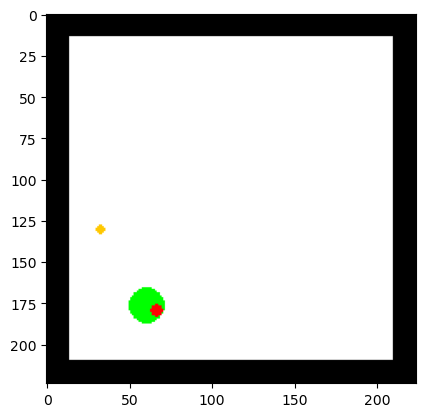

In [87]:
quick_display(imgs[0])

In [88]:
with torch.no_grad():
    context = brain.img_enc(imgs)

In [89]:
logpas, entropies = buffer.get_probabilities_and_entropies(evaluation=False)

In [90]:
buffer

In [91]:
buffer.traces

tensor([[0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2],
        [0, 2]], device='cuda:1')

In [92]:
logpas # yes, this seems actually correct: something close to 0, for a prob close to 1.0

tensor([[-0.0109],
        [-0.0119],
        [-0.0108],
        [-0.0110],
        [-0.0108],
        [-0.0111],
        [-0.0110],
        [-0.0112],
        [-0.0117],
        [-0.0110],
        [-0.0118],
        [-0.0108],
        [-0.0108],
        [-0.0103],
        [-0.0105],
        [-0.0108]], device='cuda:1', grad_fn=<CopySlices>)

In [99]:
buffer.logpas

tensor([[-0.0108],
        [-0.0119],
        [-0.0108],
        [-0.0110],
        [-0.0109],
        [-0.0110],
        [-0.0110],
        [-0.0112],
        [-0.0118],
        [-0.0110],
        [-0.0119],
        [-0.0108],
        [-0.0108],
        [-0.0103],
        [-0.0105],
        [-0.0108]], device='cuda:1')

In [101]:
ratios = (logpas - buffer.logpas).exp()
ratios

tensor([[1.0000],
        [1.0000],
        [1.0000],
        [1.0001],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0001],
        [1.0000],
        [1.0000],
        [1.0000],
        [1.0001],
        [1.0000],
        [1.0000],
        [1.0000]], device='cuda:1', grad_fn=<ExpBackward0>)

In [102]:
buffer.gaes

tensor([[-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782]], device='cuda:1')

In [104]:
pi_obj = buffer.gaes * ratios
pi_obj

tensor([[-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782]], device='cuda:1', grad_fn=<MulBackward0>)

In [105]:
pi_obj_clipped = buffer.gaes * ratios.clamp(1.0 - policy_clip_range,
                                                       1.0 + policy_clip_range)
pi_obj_clipped

tensor([[-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782],
        [-0.0782]], device='cuda:1', grad_fn=<MulBackward0>)

In [106]:
policy_loss = -torch.min(pi_obj, pi_obj_clipped).mean()
policy_loss

tensor(0.0782, device='cuda:1', grad_fn=<NegBackward0>)

In [108]:
entropy_loss = -entropies.mean() * entropy_loss_weight
entropy_loss

tensor(-0.0007, device='cuda:1', grad_fn=<MulBackward0>)

In [109]:
loss = policy_loss + entropy_loss
loss

tensor(0.0775, device='cuda:1', grad_fn=<AddBackward0>)

In [110]:
# ok, I finally think this is getting computed the right way, now
# It didn't used to get computed the right way (indeces wrong and all over the place)
# I haven't really checked how past_terminated is used, either. I will check there if it fails to train tonight.

In [93]:
# huh.
# Odd. 
# It can't be this low. Not possible
# I think it's still computing logpas incorrectly

In [94]:
logits = brain.sentence_autoencoder(buffer.traces, context=context, use_masks=True, return_full=False)
logits

tensor([[ 0.5089,  0.1637,  0.0397,  0.1482, -0.2933],
        [ 0.4546,  0.1819,  0.0443,  0.1562, -0.2144],
        [ 0.5553,  0.1314, -0.0528,  0.0365, -0.3033],
        [ 0.5195,  0.2521, -0.0069,  0.0471, -0.2732],
        [ 0.5226,  0.2174,  0.0344,  0.0395, -0.2937],
        [ 0.4834,  0.2502,  0.0835,  0.1211, -0.2854],
        [ 0.4988,  0.1898,  0.0669,  0.1476, -0.2746],
        [ 0.5234,  0.1289, -0.0268,  0.0518, -0.2111],
        [ 0.5236,  0.1909, -0.0434,  0.0188, -0.1712],
        [ 0.5674,  0.1845, -0.0395,  0.0469, -0.2544],
        [ 0.4896,  0.1885, -0.0747,  0.0400, -0.2445],
        [ 0.4667,  0.2072, -0.0150, -0.0386, -0.3373],
        [ 0.5312,  0.2471,  0.0773,  0.0578, -0.3124],
        [ 0.5761,  0.1311, -0.0025,  0.0604, -0.2620],
        [ 0.4970,  0.2066, -0.0205,  0.0773, -0.2401],
        [ 0.5207,  0.2181, -0.0215,  0.0259, -0.2712]], device='cuda:1',
       grad_fn=<AddmmBackward0>)

In [95]:
dist = Categorical(logits = logits / 1.0)

In [96]:
inds = buffer.traces[:, -1]
inds

tensor([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2], device='cuda:1')

In [97]:
dist.log_prob(inds)

tensor([-1.7159, -1.7130, -1.7768, -1.7596, -1.7148, -1.6869, -1.6985, -1.7605,
        -1.7869, -1.7889, -1.7959, -1.7172, -1.6897, -1.7515, -1.7645, -1.7610],
       device='cuda:1', grad_fn=<SqueezeBackward1>)

In [98]:
# ok. THis is what it's supposed to be.
#